In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from scipy.signal import savgol_filter
import plotly.express as px
import plotly.graph_objects as go
from icecream import ic
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

import scipy.cluster.hierarchy as spc

In [78]:
data = pd.read_excel("../data/Dataset_HPLC.xlsx", sheet_name="Vungtrong (140)")
data.head(5)

,No.,Name,Group,%CM,%CA,%CAL,600,602,604,606,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,1,21.1.8.YB-13,1,2.57,0.09,9.83,0.222,0.223,0.221,0.217,...,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006,-0.006
1,2,21.1.8.YB-24,1,0.69,0.04,3.75,0.263,0.261,0.257,0.257,...,-0.007,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
2,3,21.1.8.YB-38,1,0.43,0.05,5.53,0.252,0.253,0.253,0.252,...,-0.006,-0.007,-0.007,-0.007,-0.006,-0.007,-0.007,-0.007,-0.007,-0.007
3,4,21.1.8.YB-40,1,2.04,0.06,5.21,0.259,0.258,0.259,0.259,...,-0.008,-0.009,-0.009,-0.009,-0.008,-0.008,-0.008,-0.009,-0.009,-0.009
4,5,21.1.8.YB-41,1,0.13,0.09,4.60,0.206,0.203,0.200,0.198,...,0.000,-0.001,0.000,0.001,0.001,0.000,0.000,-0.001,-0.001,-0.001


In [79]:
y = data["Group"]
X = data.iloc[:, 6:]
X.columns = X.columns.astype(str)
cols = X.columns

### Cluster analysis on raw data

Text(0, 0.5, 'Cosine')

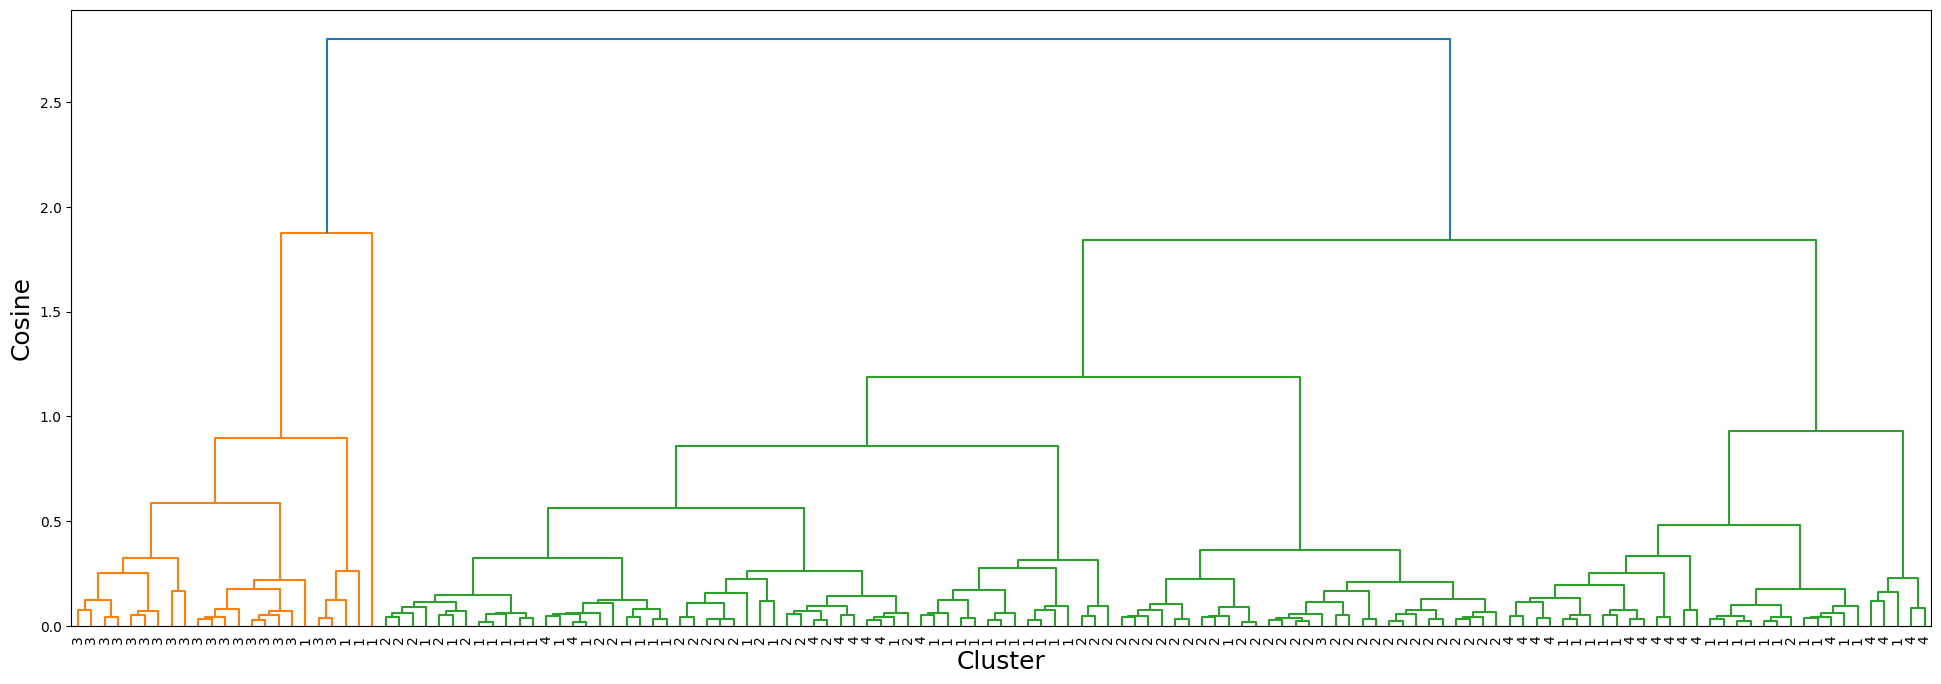

In [80]:
df = pd.DataFrame(X.T)
corr = df.corr('pearson').values
plt.figure(figsize=(24, 8))
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='ward', metric='cosine')
den = dendrogram(linkage,
            orientation='top',
            labels=y.values,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=10)
plt.xlabel("Cluster", fontsize=18)
plt.ylabel("Cosine", fontsize=18)

Cluster      1   2
True Label        
1           44   4
2           48   0
3            1  19
4           23   0


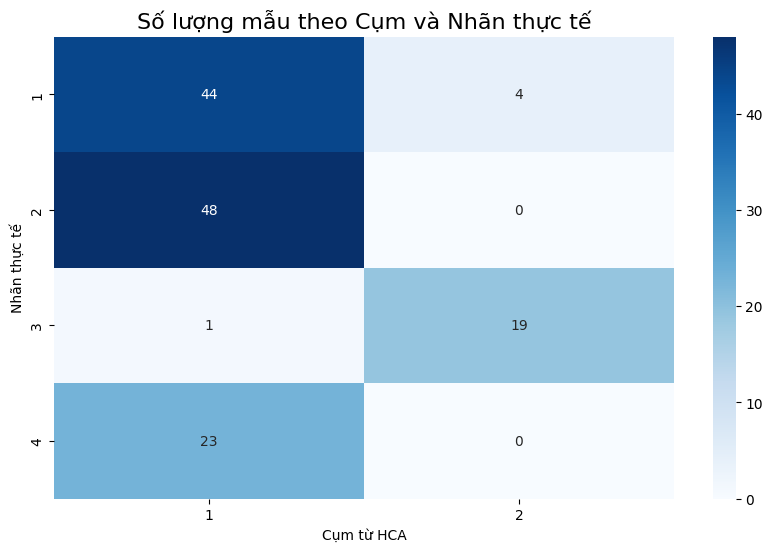

In [81]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Số lượng cụm bạn muốn tạo từ cây HCA, ví dụ: 5
num_clusters = 2

# Gán nhãn cụm cho mỗi mẫu
cluster_labels = fcluster(linkage, num_clusters, criterion='maxclust')

# Tạo DataFrame với nhãn cụm và nhãn thực tế
cluster_df = pd.DataFrame({
    'Cluster': cluster_labels,
    'True Label': y.values
})

# Tạo bảng đếm số lượng (confusion table)
count_table = pd.crosstab(cluster_df['True Label'], cluster_df['Cluster'])

# In bảng
print(count_table)

# Tuỳ chọn: trực quan hoá bảng bằng heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_table, annot=True, fmt='d', cmap='Blues')
plt.title("Số lượng mẫu theo Cụm và Nhãn thực tế", fontsize=16)
plt.xlabel("Cụm từ HCA")
plt.ylabel("Nhãn thực tế")
plt.show()


### PCA on raw data

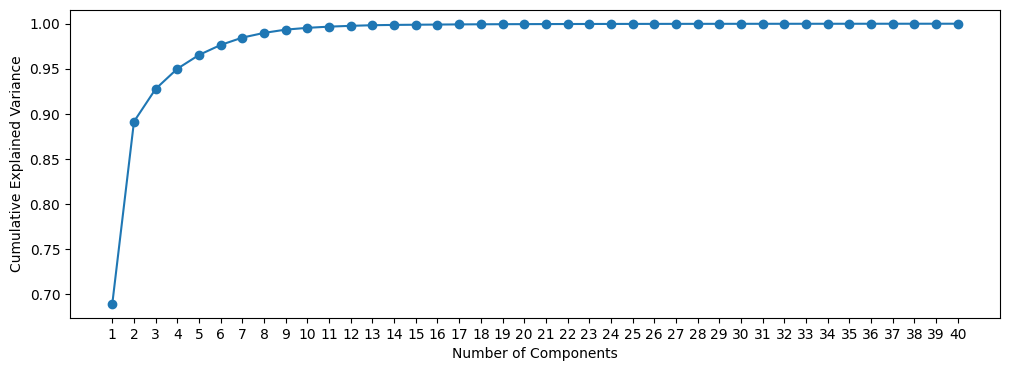

In [82]:
pca = PCA(40)
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(12,4))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [83]:
season = {
    1: 'Yen Bai',
    2: 'Quang Nam',
    3: 'Quang Ninh',
    4: 'Thanh Hoa',
}
color = {
    1: 'red',
    2: 'blue',
    3: 'green',
    4: 'orange',
}

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

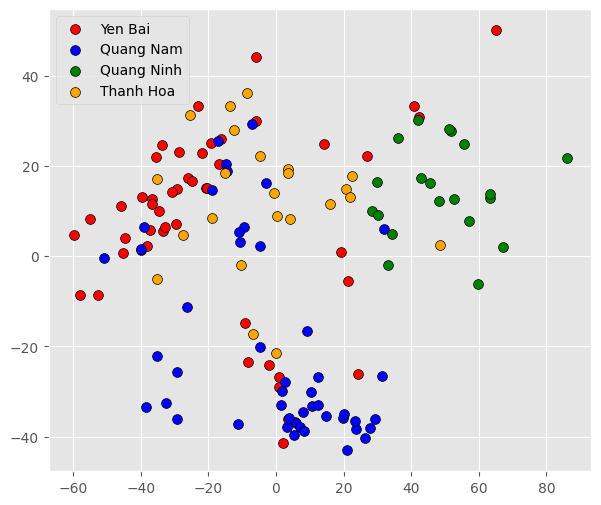

In [85]:
reducer = PCA(2)
embedding = reducer.fit_transform(X_scaled)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(7, 6))
    for key, value in season.items():
        ax.scatter(embedding[:, 0][y==key], embedding[:, 1][y==key], c=color[key], label=value, edgecolors='k', s = 50)
    ax.legend()
    plt.show()

### Đạo hàm bậc 1

In [86]:
X_deriv1 = savgol_filter(X, window_length=25, polyorder=5, deriv=1)

Text(0, 0.5, 'Cosine')

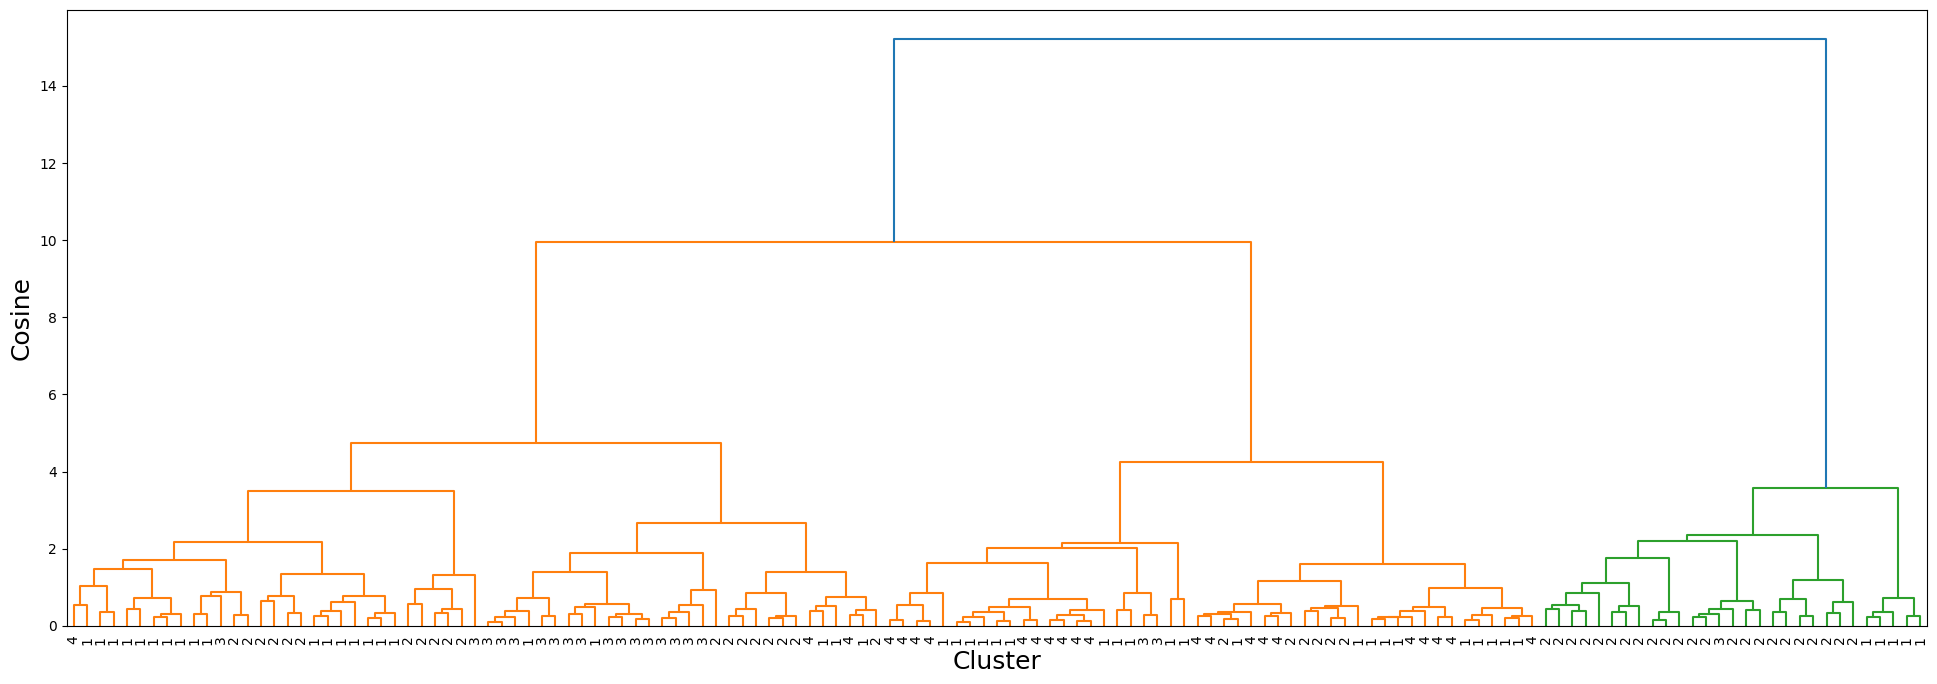

In [87]:
df = pd.DataFrame(X_deriv1.T)
corr = df.corr('pearson').values
plt.figure(figsize=(24, 8))
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='ward', metric='cosine')
den = dendrogram(linkage,
            orientation='top',
            labels=y.values,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=10)
plt.xlabel("Cluster", fontsize=18)
plt.ylabel("Cosine", fontsize=18)

Cluster      1   2
True Label        
1            5  43
2           23  25
3            1  19
4            0  23


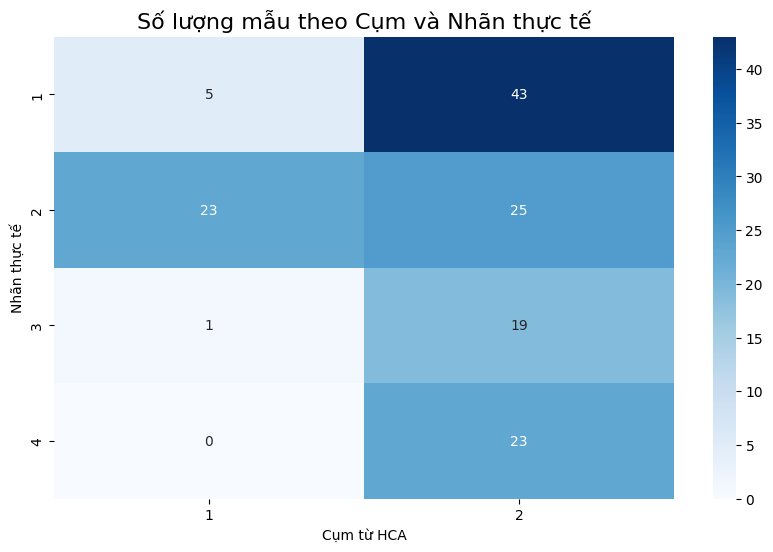

In [88]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Số lượng cụm bạn muốn tạo từ cây HCA, ví dụ: 5
num_clusters = 2

# Gán nhãn cụm cho mỗi mẫu
cluster_labels = fcluster(linkage, num_clusters, criterion='maxclust')

# Tạo DataFrame với nhãn cụm và nhãn thực tế
cluster_df = pd.DataFrame({
    'Cluster': cluster_labels,
    'True Label': y.values
})

# Tạo bảng đếm số lượng (confusion table)
count_table = pd.crosstab(cluster_df['True Label'], cluster_df['Cluster'])

# In bảng
print(count_table)

# Tuỳ chọn: trực quan hoá bảng bằng heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_table, annot=True, fmt='d', cmap='Blues')
plt.title("Số lượng mẫu theo Cụm và Nhãn thực tế", fontsize=16)
plt.xlabel("Cụm từ HCA")
plt.ylabel("Nhãn thực tế")
plt.show()


In [89]:
scaler = StandardScaler()
X_deriv1 = scaler.fit_transform(X_deriv1)

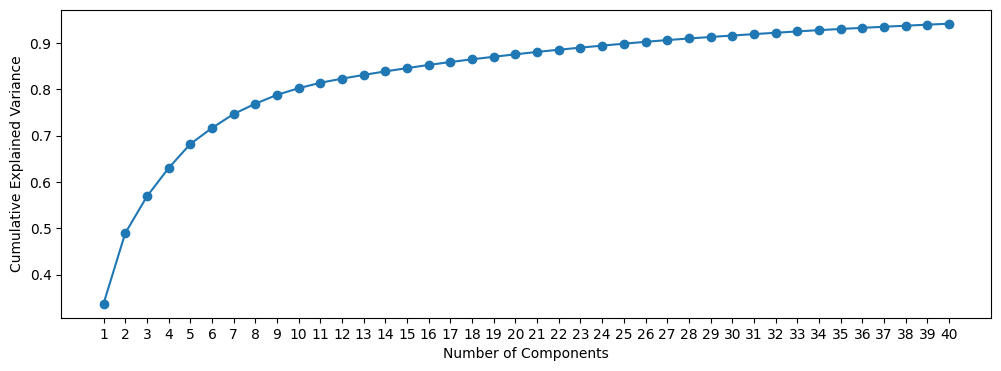

In [90]:
pca = PCA(40)
pca.fit(X_deriv1)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(12,4))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

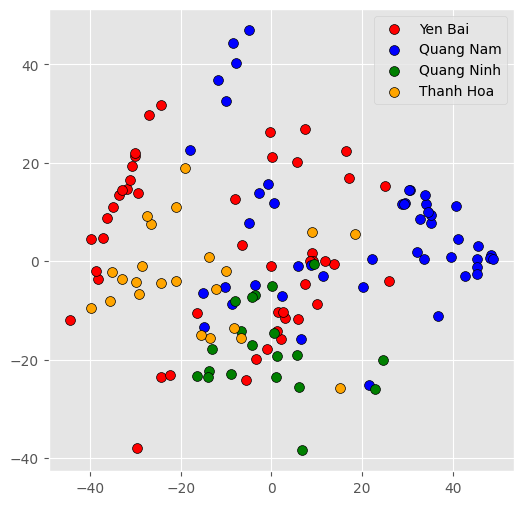

In [91]:
reducer = PCA(2)
embedding = reducer.fit_transform(X_deriv1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(6, 6))
    for key, value in season.items():
        ax.scatter(embedding[:, 0][y==key], embedding[:, 1][y==key], c=color[key], label=value, edgecolors='k', s = 50)
    ax.legend()
    plt.show()

### Đạo hàm bậc 2

In [92]:
X_deriv2 = savgol_filter(X, window_length=25, polyorder=5, deriv=2)

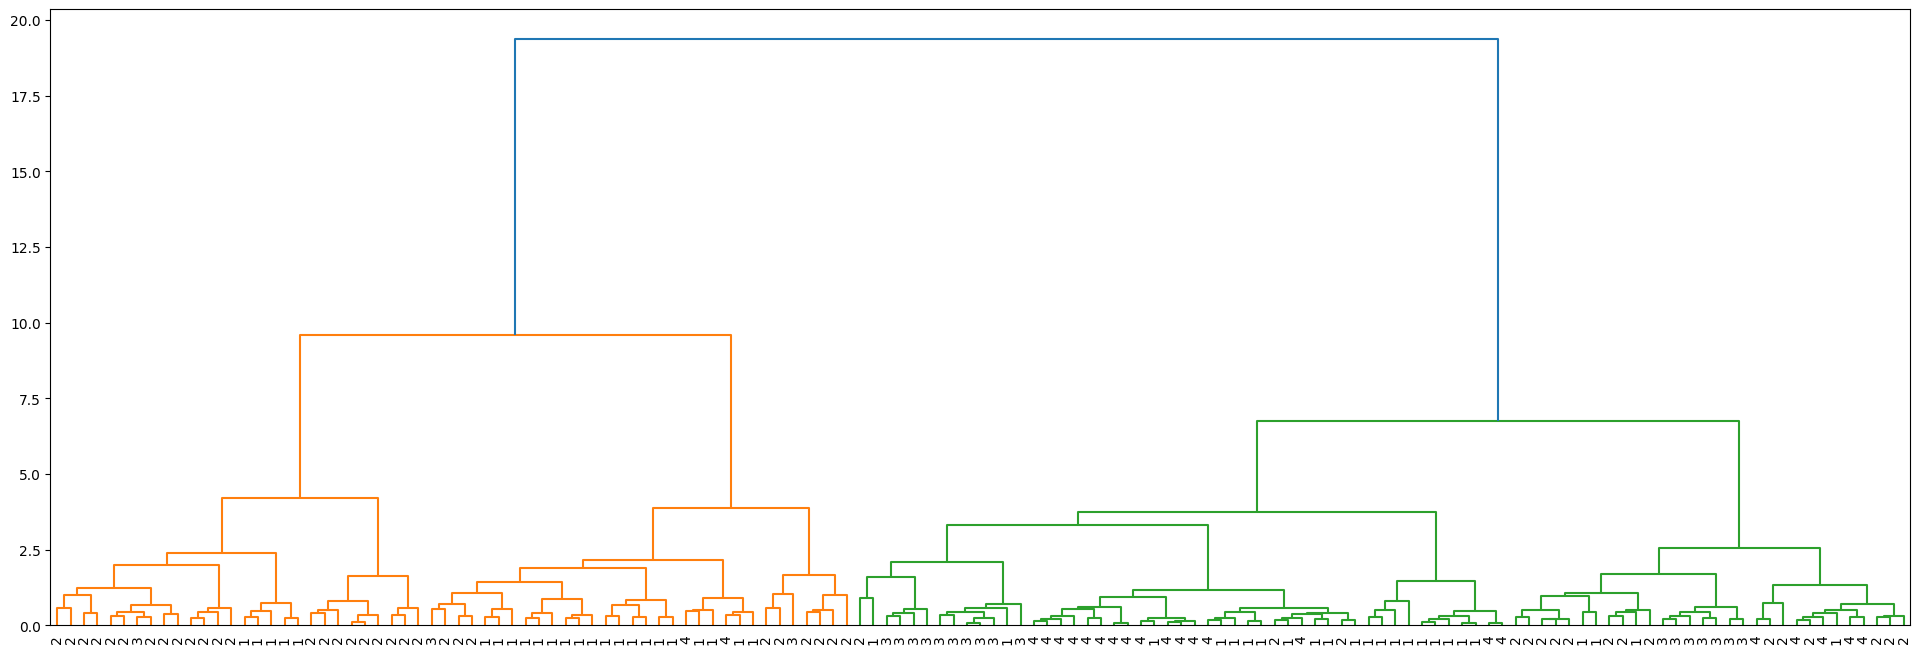

In [93]:
df = pd.DataFrame(X_deriv2.T)
corr = df.corr('pearson').values
plt.figure(figsize=(24, 8))
pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, method='ward', metric='cosine')
den = dendrogram(linkage,
            orientation='top',
            labels=y.values,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_font_size=10)

In [94]:
scaler = StandardScaler()
X_deriv2 = scaler.fit_transform(X_deriv2)

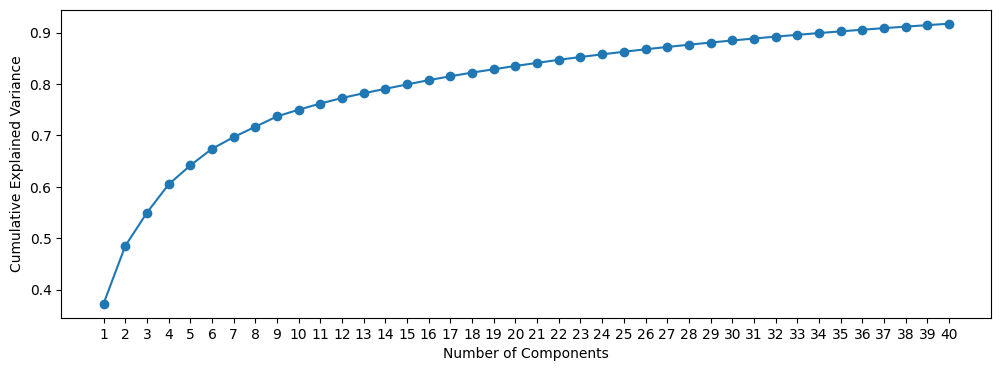

In [95]:
pca = PCA(40)
pca.fit(X_deriv2)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(12,4))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

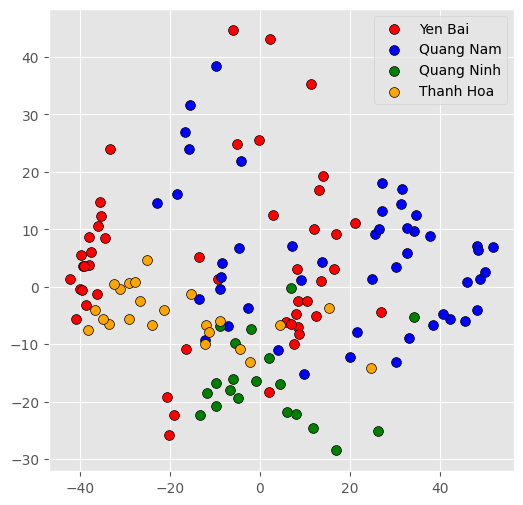

In [96]:
reducer = PCA(2)
embedding = reducer.fit_transform(X_deriv2)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(6, 6))
    for key, value in season.items():
        ax.scatter(embedding[:, 0][y==key], embedding[:, 1][y==key], c=color[key], label=value, edgecolors='k', s = 50)
    ax.legend()
    plt.show()